<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [1]:
#调入常用包
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\Jay\\mypyworks\\jupyter文件'

In [11]:
penguins = sns.load_dataset("penguins")

In [12]:
penguins 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


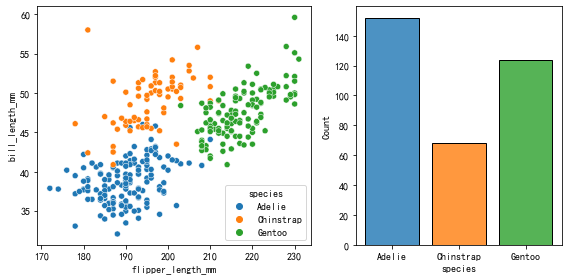

In [10]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


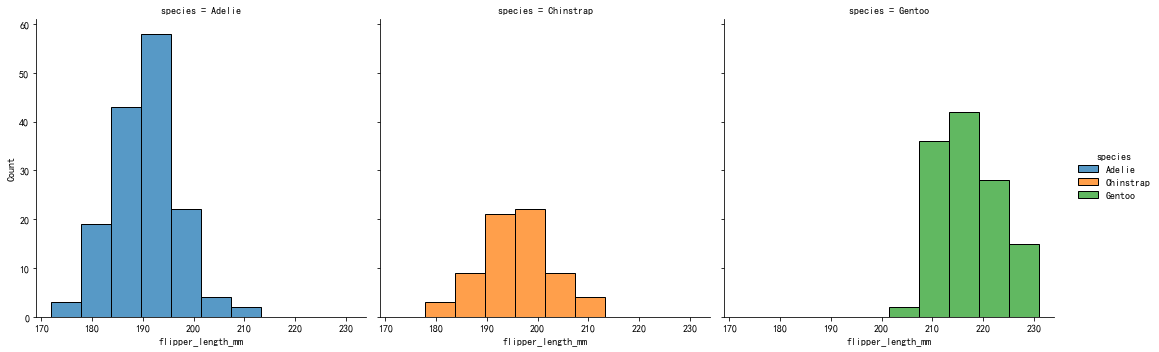

In [24]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

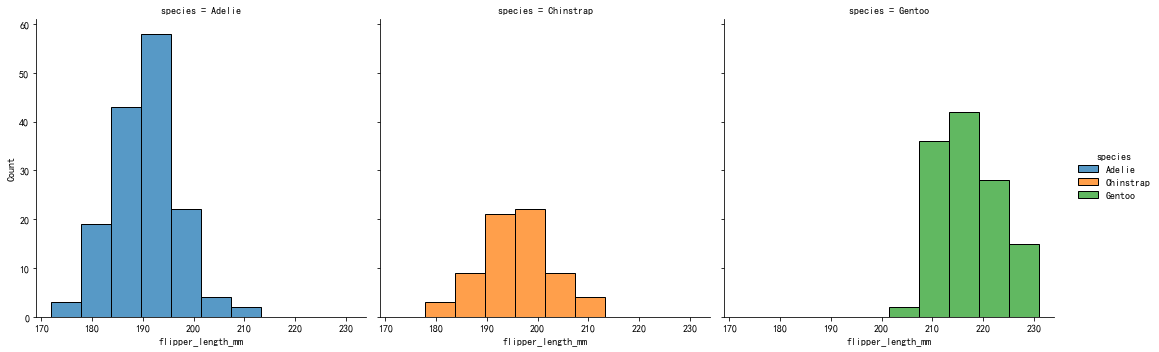

In [25]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species",col="species")

In [2]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

1.9.0


In [ ]:

data = [
    opts.SunburstItem(
        name="注册用水量",                                #第1层级
        children=[
            opts.SunburstItem(                       #1.1层级
                name="计费用水",                
                children=[
                    opts.SunburstItem(name="计量用水", value=1187494203),#1.1.1层级
                    opts.SunburstItem(name="未计量用水",value=53351685)
                    
                ],
            ),
            opts.SunburstItem(
                name="免费用水", #1.2层级               
                children=[
                    opts.SunburstItem(name="计量", value=0),
                    opts.SunburstItem(name="未计量", value=118913235),
                ],
            ),
        ],
    ),
    opts.SunburstItem(
        name="漏损水量",                                                  #第2层级
        children=[
            opts.SunburstItem(
                name="漏失",
                children=[
                    opts.SunburstItem(name="明漏", value=0),
                    opts.SunburstItem(name="暗漏", 
                                     children=[
                                        opts.SunburstItem(name="主动检出暗漏点", value=0),#1.1.1层级
                                        opts.SunburstItem(name="其它",value=174714223.66)
                                     ]                    
                                     ),
                    opts.SunburstItem(name="水箱、水池的\n渗漏和溢流", value=0),
                ],
            ),
            opts.SunburstItem(
                name="计量",
                children=[
                    opts.SunburstItem(name="总分表差", value=43661780),
                    opts.SunburstItem(name="表具误差", value=8504039.48),
                ],
            ),
            opts.SunburstItem(
                name="其他",
                children=[                    
                    opts.SunburstItem(name="未注册用户和用户拒查", value=17681498.86),
                ],
            )
        ],
    ),
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
)
sunburst.render_notebook()

In [65]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

In [196]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE,width="1000px", height="600px",bg_color='white'))#
    .add_xaxis(danwei)
    .add_yaxis("累计3月计划",jihua, label_opts=opts.LabelOpts(
                                                        ))
    .add_yaxis("累计3月完成",wancheng , stack="stack1")
    .add_yaxis("去年同期",[-x for x in tongqi], stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
#params是根据js下echarts中series中的字典式的变量名来确定的。data表示一个数据而非数组。如果有嵌套则继续选择属性。比如.data.value。data通用value
#params.dataIndex 表示数据位置序号。条件判断params.value> 0 ? ('+' + params.value) : ('-' + params.value); formatter={value}也可以
#对于坐标轴params 直接传刻度值
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ )                                             
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c.render_notebook()

In [180]:
ThemeType

In [7]:
zone2 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [8]:
zone2

,分公司颜色,编号,名称,供水量,在册售水量,售水量,免费水量,综合产销差
14,#003366,南2,赤沙仑头北山,131.88,152.34,152.59,4.70,-15.710000
24,#ff0000,北2,江村东片,542.41,594.39,596.06,4.61,-9.890000
10,#0080ff,东8,罗岗片区,121.14,126.98,130.00,0.90,-7.310000
23,#ff0000,北1,机场花都,700.13,730.13,731.76,6.33,-4.520000
27,#ff0000,北5,石门石井,356.44,340.76,368.26,21.26,-3.320000
21,#003366,南10,金沙洲区域,203.53,198.36,204.29,79.30,-0.370000
17,#003366,南5,大学城,218.16,214.61,214.91,10.14,1.490000
29,#ff0000,北7,白云新城,145.89,140.43,142.24,72.90,2.500000
9,#0080ff,东7,文冲片区,1813.40,1729.38,1759.81,66.46,2.960000
11,#0080ff,东9,南岗片区,1035.48,926.91,996.91,33.60,3.720000


In [9]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
"""
y = []
for idx, item in enumerate(x):
    if idx <= xlen / 2:
        y.append(
            opts.BarItem(
                name=item,
                value=(idx + 1) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#749f83"),
            )
        )
    else:
        y.append(
            opts.BarItem(
                name=item,
                value=(xlen + 1 - idx) * 10,
                itemstyle_opts=opts.ItemStyleOpts(color="#d48265"),
            )
        )
"""


x=list(zone2['编号'])
y=[dict(value=x,itemStyle=dict(color=y)) for x,y in zip(zone2['综合产销差'],zone2['分公司颜色'])]
c = (
    Bar(init_opts=opts.InitOpts(width="800px", height="600px",bg_color='white'))
    .add_xaxis(x)
    .add_yaxis("",y,               
              #markpoint_opts=opts.MarkPointOpts(data=[
                  #opts.MarkPointItem(name="重点片区", coord=['荔湾西片',y[x.index('荔湾西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['体育中心片',y[x.index('体育中心片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['员村片',y[x.index('员村片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村东片',y[x.index('芳村东片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['芳村西片',y[x.index('芳村西片')]['value'] ], value='重'),
                  #opts.MarkPointItem(name="重点片区", coord=['机场广园片',y[x.index('机场广园片')]['value'] ], value='重'),]),
              )  
    .reversal_axis()
    .set_global_opts(title_opts=opts.TitleOpts(title="累计2月二级分区产销差排名",pos_left='center',),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=0)),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  #params代表整个系列,第一个是系列名，第二个是data（y的位置），data里面有value等
                                            """function(params) {
                                             return params.data.value.toFixed(2) 
                                            }
                                        """ ),
                                               position="right",
                                               color="black",
                                              ),
                    )
)
    

c.render_notebook()

In [3]:
#分公司分布图
zone3 = pd.read_excel(r'e:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析月报图表.xlsx',sheet_name=6)
zone3 = zone3.query("月份 in ['1月','2月']") 
zone3

,分公司,编号,片区名称,月份,累计产销差率
0,中区,中1,同德围片,1月,46.71
1,中区,中2,同和片,1月,20.64
2,中区,中3,罗涌围片,1月,34.52
3,中区,中4,二沙岛片,1月,43.27
4,中区,中5,河沙片,1月,42.90
...,...,...,...,...,...
63,北区,北3,江村西片,2月,30.69
64,北区,北4,嘉禾均禾,2月,6.47
65,北区,北5,石门石井,2月,-3.32
66,北区,北6,机场路广园新村,2月,35.17


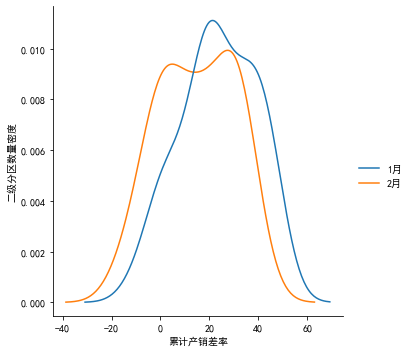

In [8]:
#f, axes = plt.subplots(2,2, figsize=(6, 4),sharex=True)
#sns.kdeplot(data=zone3 , x="累计产销差率", hue="月份",ax=axes[0,1])#类别画图函数可以分面。专项绘图函数不行。
#sns.despine(left=True) #移除边框
g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",kind="kde",height=5)#必须用细项函数才可以写到axes里面,一个图不加ax索引，单行列图只加一个索引。
g.set_axis_labels('累计产销差率','二级分区数量密度')
g.legend.set_title("")


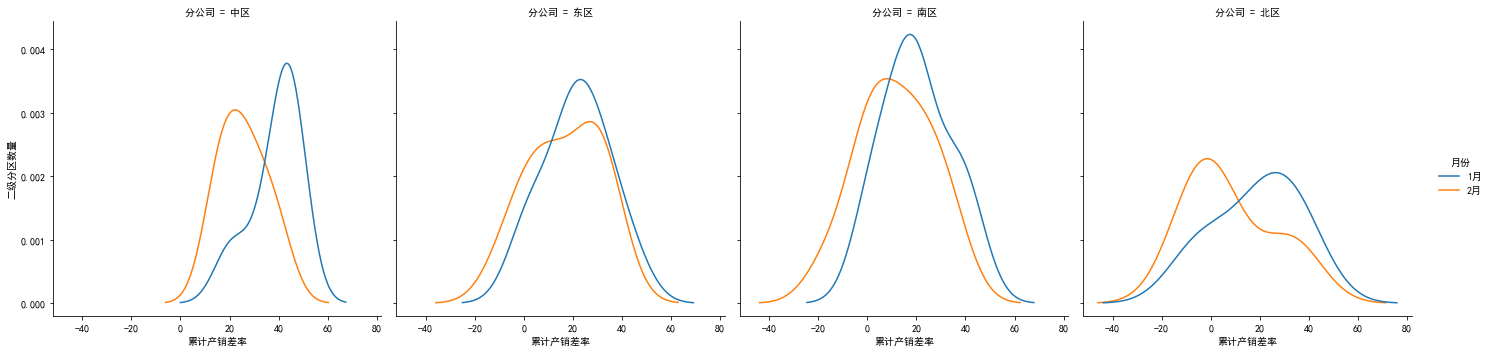

In [66]:
#g = sns.FacetGrid(zone3,col="分公司",hue="月份", height=10)
#g.map(sns.kdeplot, "累计产销差率")
g=sns.displot(data=zone3 , x="累计产销差率", hue="月份",col="分公司" ,kind="kde",col_wrap=4)
g.set_axis_labels('累计产销差率','二级分区数量密度')
#g.set(ylabel='二级分区集中度')

In [20]:
#完成计划
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)